# Lab 7
You have already used the simple Euler method to numerically solve a DE of the form
\begin{align*}
\frac{\mathrm{d}y}{\mathrm{d}x} = f (x, y).
\end{align*}
The Euler method can also be used to solve coupled DEs such as the ones we started
to look at this week. Because it is an iterative method, each coupled function can be
evaluated in small segments and then used to evaluate the other function. It is possible to tweak the Euler method to improve its rate of convergence. If you recall, the Euler method calculates an approximation to the actual solution curve
by fitting small pieces of the tangent to the curve (the DE) together. By adding a
“corrector step” to that calculation it is possible to more rapidly, and with larger steps, calculate a more accurate solution curve. It is this code we will play with today. In the improved Euler method, the first guess of the new $(x,y)$ point is calculated using the
simple Euler method - we call this the intermediate step. Then, using the intermediate
$x$ and $y$ values, an updated value of the derivative or tangent slope is calculated. The
average of the first tangent slope and the updated tangent slope is then used in the final
calculation of the new $(x,y)$ point. See pages 129-131 of the text for more information.

## Setup

In [ ]:
from numpy import arange, empty, exp, array, allclose
from scipy.integrate import odeint
from plotly.offline import init_notebook_mode
from plotly import graph_objs as go

## The vectorised improved Euler method
This implementation incorporates two improvements over the `euler` function we saw in Week 4. It implements the improved Euler method described above and allows (requires) $y$ to be a vector, so that it can solve systems of DEs.

In [ ]:
def euler_improved(func, y0, t0, tn, Dt):
    """
    Integrate an ordinary differential equation using an improved Euler method (Huen's).
    
    Solves the initial value problem for systems of first order ode-s::
        dy/dt = func(y, t).
        
    Parameters
    ----------
    func : callable(y, t)
        Computes the derivative of y at t.
    y0 : array
        Initial condition on y.
    t0 : float
        Initial condition on t.
    tn : float
        Upper limit to value of t.
    Dt : float
        t increment.
        
    Returns
    -------
    t : float
        Array containing the value of t for each value of t0 + n * Dt,
        where n ranges from zero to floor( (tn - t0) / Dt ).
    y : array
        Array containing the value of y for each value of t.
    """
    t = arange(t0, tn, Dt)  # Create the t array
    y = empty(shape=(len(t), len(y0)))  # Create an empty y array of the same length as t
    y[0] = y0  # Set the first value of y to y0
    for n in range(len(t) - 1):  # Loop to populate the rest of the values of y
        y_int = y[n] + func(y[n], t[n]) * Dt  # Euler's method
        y[n+1] = y[n] + 0.5*(func(y[n], t[n]) + func(y_int, t[n+1])) * Dt # improved
    
    return t, y  # Return t and y as a pair

## Solving systems
Let's find the approximate solution to one of the examples we looked at in class:
\begin{align*}
\frac{\mathrm{d}x}{\mathrm{d}t} &= y, \\
\frac{\mathrm{d}x}{\mathrm{d}t} &= 2x+y,
\end{align*}
with initial conditions $x_0 = 2$ and $y_0 = 1$.

We solved for $x(t)$ and $y(t)$ by manipulating these equations until we had one
2nd-order DE in just the one dependent variable $x$ and then we solved it using the
characteristic equation method.

In order to feed this equation to our vectorised improved Euler method it is helpful to rephrase it as a matrix equation:
\begin{align*}
\frac{\mathrm{d}\mathbf{y}}{\mathrm{d}t} = \left(\begin{array}{2}0&1\\2&1\end{array}\right)\mathbf{y}\quad\text{where}\quad\mathbf{y}=\left(\begin{array}{1}x\\y\end{array}\right).
\end{align*}
The initial value is then $\mathbf{y}_0=(2, 1)$

As for the scalar case, we start by defining our DE function:

In [ ]:
def dydt(y, t):
    M = array([[0, 1],
               [2, 1]])
    return M.dot(y)

Plot the approximation along side the analytic solution. Try changing the step
increment to be larger or smaller.

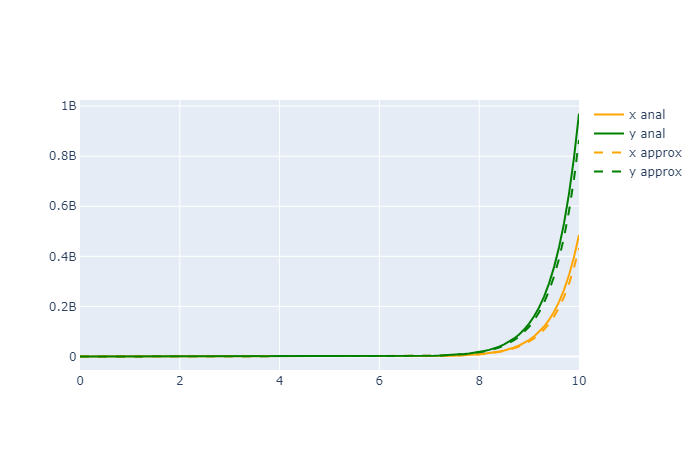

In [4]:
Dx = 0.1
t, y = euler_improved(dydt, [2, 1], 0, 10.00001, Dx)
M_anal = array([[1, 1],
                [-1, 2]])
y_anal = M_anal.dot([exp(-t), exp(2*t)]).T
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=y_anal[:,0], name='x anal',
                         line=dict(color='orange')))
fig.add_trace(go.Scatter(x=t, y=y_anal[:,1], name='y anal',
                         line=dict(color='green')))
fig.add_trace(go.Scatter(x=t, y=y[:,0], name='x approx',
                         line=dict(color='orange', dash='dash')))
fig.add_trace(go.Scatter(x=t, y=y[:,1], name='y approx',
                         line=dict(color='green', dash='dash')))
fig.show('png')

Now use the program to solve the following set of coupled differential equations.
\begin{align*}
\frac{\mathrm{d}x}{\mathrm{d}t} &= -y, \\
\frac{\mathrm{d}y}{\mathrm{d}t} &= 10.1x-0.2y,
\end{align*}
with initial conditions $x_0 = 0$ and $y_0 = 1$.

Call your DE function `dydt` in the following cell:

In [5]:
def dydt(y, t):
    M = array([[0, -1],
               [10.1, -0.2]])
    return M.dot(y)

If you have defined `dydt` properly, the following cell should plot it.

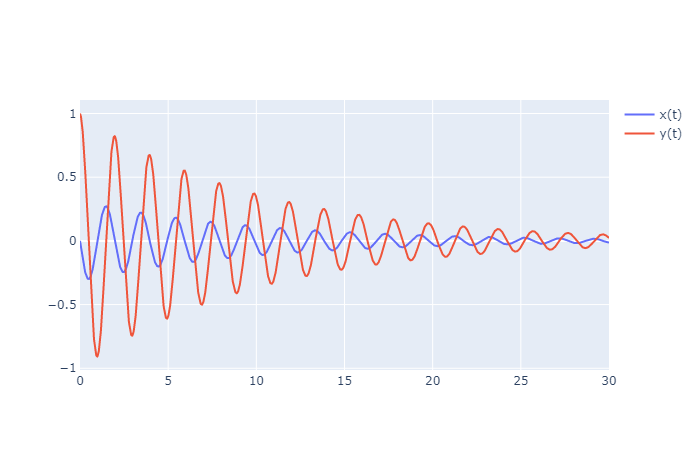

In [6]:
Dx = 0.01
t, y = euler_improved(dydt, [0, 1], 0, 30.00001, Dx)
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=y[:,0], name='x(t)'))
fig.add_trace(go.Scatter(x=t, y=y[:,1], name='y(t)'))
fig.show('png')

What happens if you set `Dx = 0.3`? Why?

The improved Euler's method gives a poor approximation to the rapidly changing derivative and the error grows quickly within the time frame

## Exercises

1. Consider two brine tanks connected to each other. Tank 1 contains
$x(t)$ kg of salt in 400 litres of water and Tank 2 contains $y(t)$ kg of salt in 800 litres
of water. Brine is pumped from Tank 1 to 2 at a rate of 30 litres/min and from
Tank 2 to 1 at a rate of 10 litres/min. Fresh water flows into Tank 1 at a rate
of 20 litres/min and brine flows out of Tank 2 at a rate of 20 litres/min. (total
volume doesn’t change). Initially, there are 50 kg of salt in each tank. Define a function with the following signature to calculate the rate of change of salt levels in both tanks with respect to time.

In [7]:
def dydt(y, t):
    """
    Calculate dy/dt as a function of y and t.
    
    Parameters
    ----------
    y : array
        the amount of salt in each tank, that is (x(t), y(t))
    t : float
        the time at which to calculate the derivative
    """
    #dxdt = rate in(x) - rate out(x)
    #dxdt = (y/800) * 10 - (x/400) * 30 = -0.075x + 0.0125y
    #dydt = rate in(y) - rate out(y)
    #dydt = (x/400) * 30 - (y/800) * 20 - (y/800) * 10 = 0.075x - 0.0375y
    M = array([[-0.075, 0.0125],
               [0.075, -0.0375]])
    return M.dot(y)
    

If you have implemented `dydt` properly, this cell should display "nice job!"

In [8]:
assert allclose(dydt([50, 50], 0), [-3.125,  1.875])
assert allclose(dydt([20, 60], 10), [-0.75, -0.75])
assert allclose(dydt([0, 0], 0), [0, 0])
assert allclose(dydt([0.5,1], 5), [-0.025, 0])
print('nice job!')

nice job!


2. Plot the amount of salt in the tanks for the first 180 minutes on the same graph.

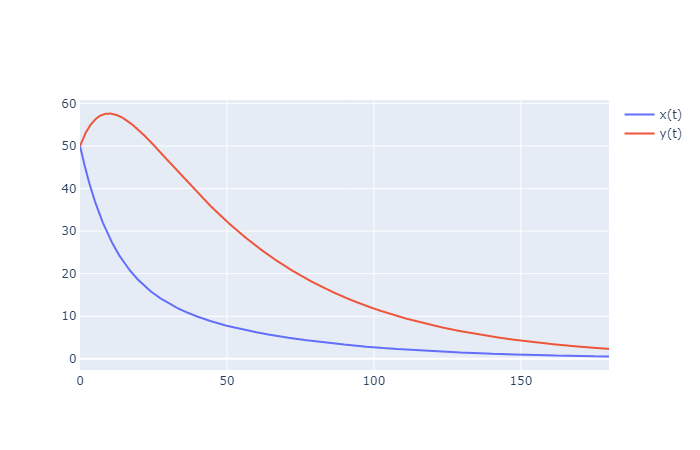

In [14]:
Dx = 0.005
t, y = euler_improved(dydt, [50, 50], 0, 180.00001, Dx)
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=y[:,0], name='x(t)'))
fig.add_trace(go.Scatter(x=t, y=y[:,1], name='y(t)'))
fig.show('png')

3. To the nearest minute, when does $y(t)$ peak? (Hint: you can read it off the graph.)

Around 9.8 minutes